# Metodología

## Recolección de datos

Importamos librerías.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random as rd
from sklearn.model_selection import train_test_split

Obtenemos la base de datos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DB = pd.read_csv('/content/drive/MyDrive/ML_TSIV/KNN/TumorDataset.csv')

En este caso especial, eliminamos desde el ahora dos atributos de la base de datos innecesarios, al ser solo de seguimiento.

In [ ]:
DB = DB[DB.columns[1:-1]]

In [ ]:
DB.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Desplegamos una muestra de los datos.

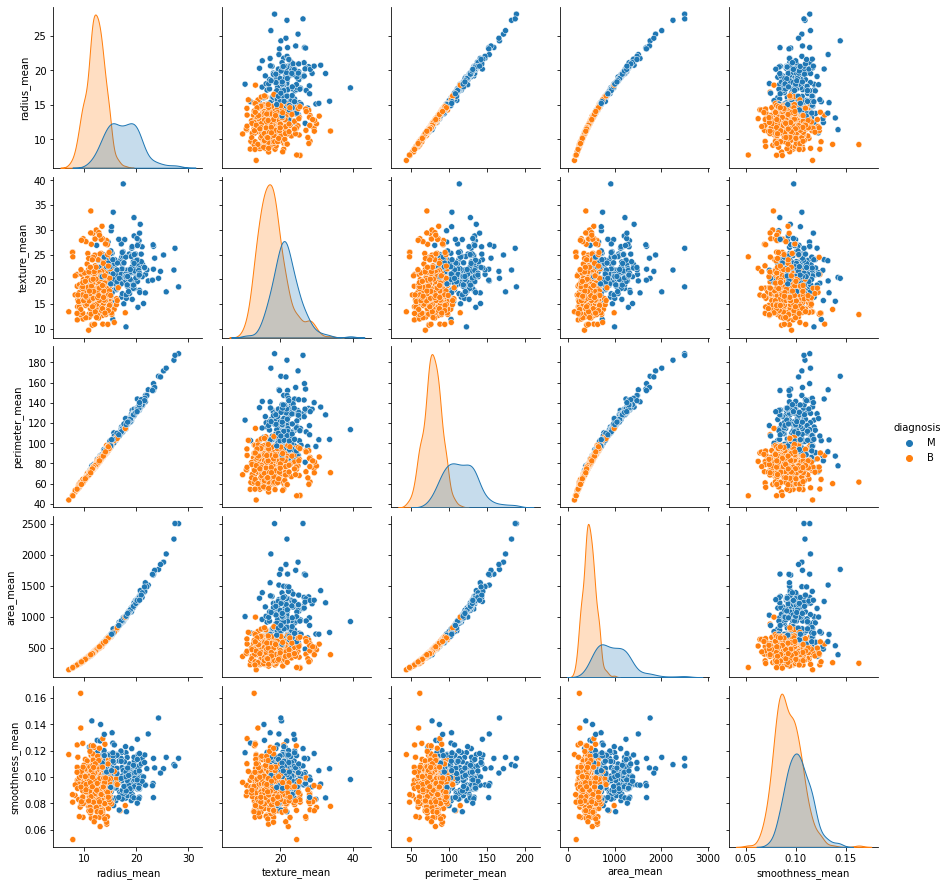

In [ ]:
sns.pairplot(DB, vars = DB.columns[1:6], hue = DB.columns[0])

## Preparación de los datos

In [ ]:
Titles = list(DB.columns)

Titles_str = []
for title in Titles:
  if type(DB[title][0]) == str:
    Titles_str.append(title)

for title in Titles_str:
  types = pd.unique(DB[title])
  i = 0
  for data in types:
    data_loc = np.where(DB[title] == data)[0]
    for pos in data_loc:
      DB[title][pos] = i
    i += 1

DB.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Analizamos los datos de forma elemental.

Calculamos la cantidad de AtributOs e Instancias.

In [ ]:
NoAtributos = len(DB.T)
NoInstancias = len(DB)

Convertimos la base de datos en un arreglo.

In [ ]:
DBar = DB.to_numpy()

Calculamos el máximo y mínimo de cada Atributo.

In [ ]:
MaximoDeAtributos = []
MinimoDeAtributos = []
for idx in range(NoAtributos):
  CaractMax = max(DBar.T[idx])
  CaractMin = min(DBar.T[idx])
  MaximoDeAtributos.append(CaractMax)
  MinimoDeAtributos.append(CaractMin)

Calculamos el primer y tercer cuartil (Q1 y Q3, respectivamente), de cada atributo.

In [ ]:
Q1 = []
Q3 = []
for idx in range(NoAtributos):
  if str(type(DBar[0][idx]))[8 : -2] != 'str':
    atrib = DBar.T[idx].tolist()
    atrib.sort()

    NoCuartil1 = 0.25 * (NoInstancias + 1)
    if str(type(NoCuartil1))[8 : -2] != 'int':
      pos1 = round(NoCuartil1)
      if pos1 < NoCuartil1:
        pos2 = pos1 + 1
      else:
        pos2 = pos1 - 1
      NoCuartil1 = round((pos1 + pos2) / 2)
    Cuartil1 = atrib[NoCuartil1 + 1]
    incremento = 1
    while True:
      if str(Cuartil1) == 'nan':
          Cuartil1 = atrib[NoCuartil1]
          NoCuartil1 -= 1
      else:
        break

    NoCuartil3 = 0.7 * (NoInstancias + 1)
    if str(type(NoCuartil3))[8 : -2] != 'int':
      pos1 = round(NoCuartil3)
      if pos1 < NoCuartil3:
        pos2 = pos1 + 1
      else:
        pos2 = pos1 - 1
      NoCuartil3 = round((pos1 + pos2) / 2)
    Cuartil3 = atrib[NoCuartil3 + 1]
    while True:
      if str(Cuartil3) == 'nan':
          Cuartil3 = atrib[NoCuartil3]
          NoCuartil3 -= 1
      else:
        break

  Q1.append(Cuartil1)
  Q3.append(Cuartil3)
Q1 = np.array(Q1)
Q3 = np.array(Q3)

### Detectamos outliers y eliminamos sus respectivas instancias.

Calculamos el rango intercuantílico de cada atributo.

In [ ]:
IQR = []
for idx in range(len(Q1)):
  IQR.append(Q3[idx] - Q1[idx])

Buscamos valores atípicos y el atributo en el que se encuentra ese valor (Seleccionamos quitar solo outliers extremos con OutType = 3, o también leves con OutType = 1.5). 

In [ ]:
OutType = 3

Inst2Elim = []
for idx, Atrib in enumerate(DBar.T):
  probe1 = Q1[idx] - OutType * IQR[idx]
  probe2 = Q3[idx] + OutType * IQR[idx]
  for idx2, Val in enumerate(Atrib):
    if ((Val < probe1) or (Val > probe2)) and (idx2 not in Inst2Elim):
      Inst2Elim.append(idx2)

Generamos una nuevo array de datos eliminando las instancias que contienen algún outlier.

In [ ]:
DBNOut = []
for InstNum in range(len(DBar)):
  if InstNum not in Inst2Elim:
    DBNOut.append(DBar[InstNum])

DBNOutar = np.array(DBNOut)

Desplegamos los valores sin outliers, los cuales fueron identificados considerando el rango intercuartílico.

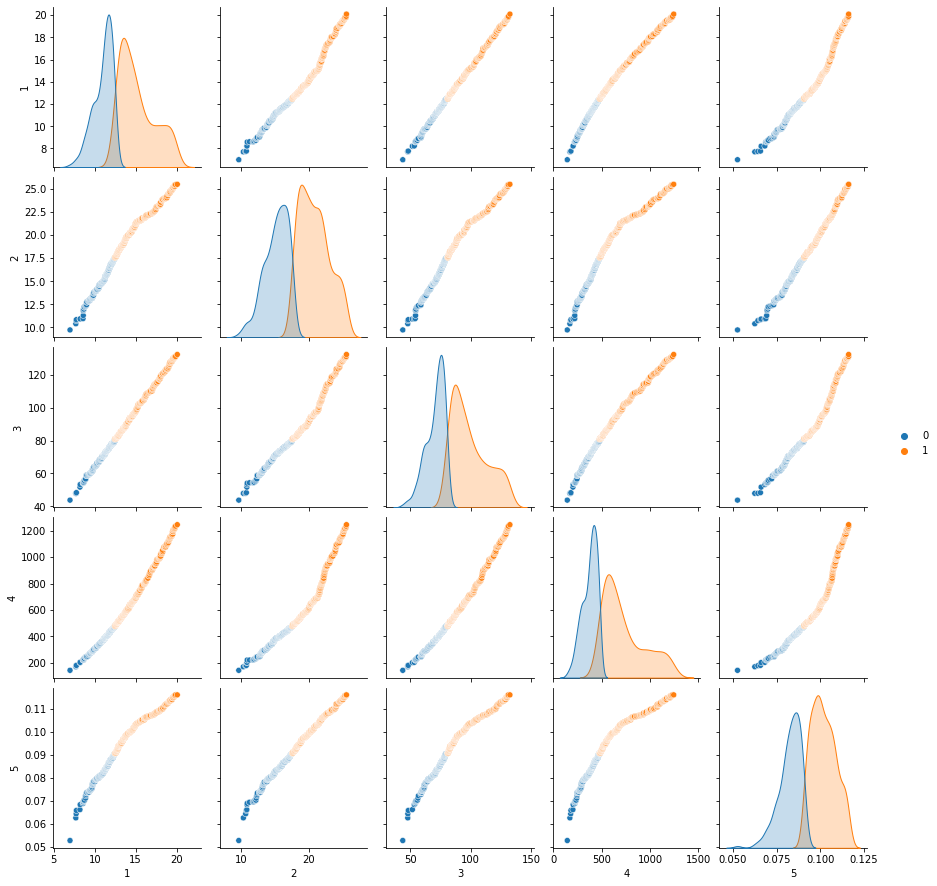

In [ ]:
showDB = pd.DataFrame(DBNOutar)
sns.pairplot(showDB, vars = showDB.columns[1:6], hue = showDB.columns[0])

### Normalizamos los datos

Elegimos un rango de normalización entre 0 y 1.

In [ ]:
MaximoNormalizado = 1
MinimoNormalizado = 0
RangoNormalizado = MaximoNormalizado - MinimoNormalizado

Normalizamos los valores y obtenemos el nuevo arreglo de valores normalizados 'DBNar'.

In [ ]:
DBNorm = []
for idx in range(NoAtributos):
  
  CaractNorm = []
  if str(type(DBar[0][idx]))[8 : -2] != 'str':
    
    RangodeDatos = MaximoDeAtributos[idx] - MinimoDeAtributos[idx]
    for idx2 in range(NoInstancias):

      if str(DBar[idx2][idx]) != 'nan':
        D = DBar[idx2][idx] - MinimoDeAtributos[idx]
        DPct = D / RangodeDatos
        dNorm = RangoNormalizado * DPct
        Normalizado = MinimoNormalizado + dNorm
        CaractNorm.append(Normalizado)
      else:
        CaractNorm.append(DBar[idx2][idx])
  
  else:
    for idx2 in range(NoInstancias):
      CaractNorm.append(DBar[idx2][idx])
  
  DBNorm.append(CaractNorm)

DBNar = np.array(DBNorm)

Visualizamos una parte de la base de datos con los valores normalizados, para garantizar una correcta transformación.

In [ ]:
DBNarT = DBNar.T
showDB = pd.DataFrame(DBNarT)
showDB.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


## Análisis de los datos

### Generación de X e Y

Reordenamos aleatoriamente la lista de la base de datos.

In [ ]:
RDBNar = rd.sample(DBNar.T.tolist(), k=len(DBNar.T))
RDBNar = np.array(RDBNar).T

Seleccionamos el atributo para nuestro valor objetivo 'Y' y el resto 'X' como ejemplos para el entrenamiento.

In [ ]:
X = DBNar[1:]
X = X.T
Y = DBNar[0]

### Serie de funciones creadas para obtener las métricas de rendimiento de un modelo.

In [ ]:
#Función para obtener el error cuadrático medio, recibe las listas de los valores predichos y los valores reales.
def MSE(MSEpred, MSEreal):
  MSEsize = len(MSEreal)
  MSEt = 0
  for MSEidx in range(MSEsize):
    MSEt += (MSEpred[MSEidx] - MSEreal[MSEidx])**2
  MSEf = MSEt / MSEsize
  return(MSEf)

#Función para calcular la tasa de clasificación, recibe las listas de los valores predichos y los valores reales.
def TC(TCpred, TCreal):
  TCsize = len(TCpred)
  TCt = 0
  for TCidx in range(TCsize):
    if TCpred[TCidx] != TCreal[TCidx]:
      TCt += 1
  TCf = 1 - TCt / TCsize
  return(TCf)

#Función que obtiene los valores de la matriz de confusión (TP, FN, FP, TN), recibe las listas de los valores predichos y los valores reales.
#Solo funciona a partir de esta métrica para etiquetas con longitud = 2, es decir binarias.
#Se decidió utilizar estas métricas en específico para nuestra base de datos ya que los tipos de sus etiquetas solo son 2, 1 o 0.
#Para proyectos con más categorías en sus etiquetas, se debe usar directamente la Exactitud, que es con la que se forma la Matriz de confusión.
def MatConf(MCpred, MCreal):
  MCsize = len(MCpred)
  MCTP = 0
  MCFN = 0
  MCFP = 0
  MCTN = 0
  for MCidx in range(MCsize):
    if MCreal[MCidx] == 1:
      if MCpred[MCidx] == 1:
        MCTP += 1
      else:
        MCFN += 1
    else:
      if MCpred[MCidx] == 1:
        MCFP += 1
      else:
        MCTN += 1
  return(MCTP, MCFN, MCFP, MCTN)

#Funciones para calcular la tasa de clasificación (TdC), incluyendo la exactitud (TdCExact), precisión (TdCPre), sensitividad o Recall (TdCSens)
#y puntaje F - beta con beta = 1, es decir, F1 (TdCF1).
def TdC(TdCTP, TdCFN, TdCFP, TdCTN):
  TdCExact = (TdCTP + TdCTN) / (TdCTP + TdCTN + TdCFP + TdCFN)
  TdCPre = TdCTP / (TdCTP + TdCFP)
  TdCSens = TdCTP / (TdCTP + TdCFN)
  TdCF1 = (2 * TdCTP) / (2 * TdCTP + TdCFP + TdCFN)
  return([TdCExact, TdCPre, TdCSens, TdCF1])

#Función para obtener las estadísticas de rendimiento, recibe las listas de los valores predichos y los valores reales.
def Estadisticas(EYPred, EYreal):
  EMSE = MSE(EYPred, EYreal)
  ETC = TC(EYPred, EYreal)
  ETP, EFN, EFP, ETN = MatConf(EYPred, EYreal)
  EExact, EPrecis, ESens, EF1 = TdC(ETP, EFN, EFP, ETN)
  Estadistica = [EMSE, ETC, EExact, EPrecis, ESens, EF1]
  return(Estadistica)

### Creación de una clase propia, la cual fungirá como un clasificador KNN.

In [ ]:
class KNN():
  def __init__(self):
    self.bestK = 3

  #Función para entrenar un modelo de KNN, cuyo entrenamiento consiste en encontrar la mejor K de acuerdo a las estadísticas de rendimiento.
  #La cantidad de épocas (fEpocas) consiste en el número de Ks distintas a probar, siendo siempre impares.
  #La prioridad asigna a qué medida de rendimiento tomar en cuenta para determinar el mejor K.
  def fit(self, fXTrainP, fYTrainP, fXTestP, fYTestP, fEpocasP = 4, fpriorityP = 'Precision'):
    self.fXtrain = fXTrainP
    self.fYtrain = fYTrainP
    self.fXtest = fXTestP
    self.fYtest = fYTestP
    self.fpriority = fpriorityP
    self.fEpocas = fEpocasP
    self.fKfin = 3 + 2 * (self.fEpocas - 1)
    self.bestK = self.SelectK()
  
  #Función para predecir un nuevo punto a partir del modelo entrenado.
  def PrednewPoint(self, KNNXnewPoint):
    self.newYpred = self.XpredP(KNNXnewPoint)
    return(self.newYpred)

  #Función que se encarga de calcular la distancia Euclidiana entre dos puntos de n dimensionalidad.
  def Euc_Dist(self, EuX1, EuX2):
    EuInSqua = 0
    for EuIdx in range(len(EuX1)):
      EuInSqua += (EuX2[EuIdx] - EuX1[EuIdx])**2
    EucDistance = EuInSqua**0.5
    return(EucDistance)
  
  #Función que obtiene las distancias entre un nuevo punto y todos los puntos de entrenamiento.
  def XDistances(self, XNew):
    XDists = []
    for Xpoint in self.fXtrain:
      XDists.append(self.Euc_Dist(XNew, Xpoint))
    return(XDists)

  #Función dedicada a calcular los K puntos más cercanos respecto a un nuevo punto.
  def KClosest(self, Knew):
    KDists = self.XDistances(Knew)
    KsortDists = sorted(KDists)
    KClosestDist =  KsortDists[:self.fKactual]
    KCposs = []
    for KCDist in KClosestDist:
      KCp = np.where(KDists == KCDist)
      KCposs.append(KCp[0][0])
    self.KClosestPoints = []
    for KCpos in KCposs:
      self.KClosestPoints.append(self.fXtrain[KCpos])
    return(self.KClosestPoints)

  #Función que busca determinar entre los K puntos más cercanos a un nuevo punto, el número de puntos de cada categoría.
  def NumPointsxCat(self, Nnew):
    NClosestPoints = self.KClosest(Nnew)
    Npos = []
    for Npoint in NClosestPoints:
      NW = np.where(self.fXtrain == Npoint)
      Npos.append(NW[0][0])
    CatxPoint = []
    for Nelement in Npos:
      CatxPoint.append(self.fYtrain[Nelement])
    return(CatxPoint)

  #Función para determinar el valor predicho de un nuevo punto.
  def XpredP(self, XnewP):
    XCatP = self.NumPointsxCat(XnewP)
    XCounterP = Counter(XCatP)
    first = XCounterP.most_common(1)
    XYpredP = first[0][0]
    return(XYpredP)

  #Función que se encarga de calcular los valores predichos de todos los punto de prueba.
  def PredAllP(self):
    PAYpred = []
    for PApoint in self.fXtest:
      PAYpred.append(self.XpredP(PApoint))
    return(PAYpred)

  #Función que obtiene las estadísticas de rendimiento con diferentes Ks.
  def fstatistics(self):
    self.fKactual = 3
    fEstadisticas = []
    print(str(self.fpriority), 'con', str(self.fEpocas), 'K distintas:')
    while self.fKactual <= self.fKfin:
      fYpred = self.PredAllP()
      fEstadistica = Estadisticas(fYpred, self.fYtest)
      print(str(self.fpriority), 'con k =', str(self.fKactual) + ':', str(fEstadistica[3]) + '.')
      fEstadisticas.append(fEstadistica)
      self.fKactual += 2
    return(fEstadisticas)
  
  #Función que selecciona la mejor K, de acuerdo a su rendimiento.
  def SelectK(self):
    SEstadisticas = self.fstatistics()
    SMSE = []
    STC = []
    SExact = [] 
    SPrecis = []
    SSens = []
    SF1 = []
    for Selement in SEstadisticas:
      SMSE.append(Selement[0])
      STC.append(Selement[1])
      SExact.append(Selement[2])
      SPrecis.append(Selement[3])
      SSens.append(Selement[4])
      SF1.append(Selement[5])

    self.MSE = min(SMSE)
    self.TC = max(STC)
    self.Exact = max(SExact)
    self.Precis = max(SPrecis)
    self.Rec = max(SSens)
    self.F1 = max(SF1)

    if self.fpriority == 'MSE':
      SW = np.where(SMSE == self.MSE) 
    elif self.fpriority == 'TdC':
      SW = np.where(STC == self.TC)
    elif self.fpriority == 'Exactitud':
      SW = np.where(SExact == self.Exact)
    elif self.fpriority == 'Precision':
      SW = np.where(SPrecis == self.Precis)
    elif self.fpriority == 'Recall':
      SW = np.where(SSens == self.Rec)
    elif self.fpriority == 'F1':
      SW = np.where(SF1 == self.F1)
    else:
      SW = np.where(SPrecis == self.Precis)

    SBestPos = SW[0]
    BestK = 3 + 2 * (SBestPos - 1)
    return(BestK)
  
  #Función que permite obetener la precisión final del modelo, tomado con la mejor K.
  def get_precision(self):
    return(self.Precis)

  #Función que permite obetener la estadística final seleccionada por 'GSName' del cualqueir modelo generado.
  def get_stadistict(self, GSName):
    if GSName == 'MSE':
      GSResult = self.MSE
    elif GSName == 'TdC':
      GSResult = self.TC
    elif GSName == 'Exactitud':
      GSResult = self.Exact
    elif GSName == 'Precision':
      GSResult = self.Precis
    elif GSName == 'Recall':
      GSResult = self.Rec
    elif GSName == 'F1':
      GSResult = self.F1
    else:
      GSResult = self.Precis
    return(GSResult)

## Entrenamos un modelo con el algoritmo de KNN generado.

### Separamos a X e Y en conjuntos para el entrenamiento y para las pruebas.

Primeramente apartamos una sección pequeña de datos de validación para las pruebas finales (Xval, Yval) y dejamos el resto para el entrenamiento (Xres, Yres).

Nota: 

Los datos de X y Y ya están re-ordenados aleatoriamente al haber sido formados por una variación de la base de datos re-ordenada aleatoriamente.

In [ ]:
Xres, Xval, Yres, Yval = train_test_split(X, Y, test_size = 0.10)

### Entrenamos el modelo

Separaremos los valores en cada iteración de acuerdo al método de validación cruzada (K-FOLD), tomando un K = 5, es decir un 5-FOLD.

In [ ]:
DBsize = len(Xres)
DBp = DBsize / 5
VDB = int(DBp)
CDB = int(DBp * 2)
SDB = int(DBp * 3)
ODB = int(DBp * 4)

Xtest1, Xtrain1, Ytest1, Ytrain1 = train_test_split(Xres, Yres, test_size = 0.80, shuffle = False)

Xtrain2, Ytrain2 = Xres[:VDB].tolist() + Xres[CDB:].tolist(), Yres[:VDB].tolist() + Yres[CDB:].tolist()
Xtrain2, Ytrain2 = np.array(Xtrain2), np.array(Ytrain2)
Xtest2, Ytest2 = Xres[VDB:CDB], Yres[VDB:CDB]

Xtrain3, Ytrain3 = Xres[:CDB].tolist() + Xres[SDB:].tolist(), Yres[:CDB].tolist() + Yres[SDB:].tolist()
Xtrain3, Ytrain3 = np.array(Xtrain3), np.array(Ytrain3)
Xtest3, Ytest3 = Xres[CDB:SDB], Yres[CDB:SDB]

Xtrain4, Ytrain4 = Xres[:SDB].tolist() + Xres[ODB:].tolist(), Yres[:SDB].tolist() + Yres[ODB:].tolist()
Xtrain4, Ytrain4 = np.array(Xtrain4), np.array(Ytrain4)
Xtest4, Ytest4 = Xres[SDB:ODB], Yres[SDB:ODB]

Xtrain5, Xtest5, Ytrain5, Ytest5 = train_test_split(Xres, Yres, test_size = 0.20, shuffle = False)

Entrenamos con KNN cada uno de los 5 grupos de datos
Nota: Es posible elegir qué métrica ('MSE', 'TdC', 'Exactitud', 'Precision', 'Recall' o 'F1') tomar como referencia, en este caso se elige 'Precision'.

In [ ]:
model1 = KNN()
model1.fit(Xtrain1, Ytrain1, Xtest1, Ytest1, fEpocasP = 5, fpriorityP = 'Precision')
print('')
model2 = KNN()
model2.fit(Xtrain2, Ytrain2, Xtest2, Ytest2, fEpocasP = 5, fpriorityP = 'Precision')
print('')
model3 = KNN()
model3.fit(Xtrain3, Ytrain3, Xtest3, Ytest3, fEpocasP = 5, fpriorityP = 'Precision')
print('')
model4 = KNN()
model4.fit(Xtrain4, Ytrain4, Xtest4, Ytest4, fEpocasP = 5, fpriorityP = 'Precision')
print('')
model5 = KNN()
model5.fit(Xtrain5, Ytrain5, Xtest5, Ytest5, fEpocasP = 5, fpriorityP = 'Precision')

Precision con 5 K distintas:
Precision con k = 3: 0.8428571428571429.
Precision con k = 5: 0.8378378378378378.
Precision con k = 7: 0.8271604938271605.
Precision con k = 9: 0.8192771084337349.
Precision con k = 11: 0.8292682926829268.

Precision con 5 K distintas:
Precision con k = 3: 0.7564102564102564.
Precision con k = 5: 0.7804878048780488.
Precision con k = 7: 0.7948717948717948.
Precision con k = 9: 0.7875.
Precision con k = 11: 0.8.

Precision con 5 K distintas:
Precision con k = 3: 0.7682926829268293.
Precision con k = 5: 0.8.
Precision con k = 7: 0.810126582278481.
Precision con k = 9: 0.84.
Precision con k = 11: 0.7974683544303798.

Precision con 5 K distintas:
Precision con k = 3: 0.7571428571428571.
Precision con k = 5: 0.7971014492753623.
Precision con k = 7: 0.7866666666666666.
Precision con k = 9: 0.7922077922077922.
Precision con k = 11: 0.7894736842105263.

Precision con 5 K distintas:
Precision con k = 3: 0.717948717948718.
Precision con k = 5: 0.7564102564102564.
Pre

Determinamos la precisión individual de cada modelo y la precisión final del análisis K-Fold.

In [ ]:
Stadistic1 = model1.get_stadistict('Precision')
Stadistic2 = model2.get_stadistict('Precision')
Stadistic3 = model3.get_stadistict('Precision')
Stadistic4 = model4.get_stadistict('Precision')
Stadistic5 = model5.get_stadistict('Precision')

StadisticFin = (Stadistic1 + Stadistic2 + Stadistic3 + Stadistic4 + Stadistic5) / 5

Desplegamos las precisiones determinadas.

In [ ]:
print('Precisión 1 =', str(Stadistic1) + '.')
print('Precisión 2 =', str(Stadistic2) + '.')
print('Precisión 3 =', str(Stadistic3) + '.')
print('Precisión 4 =', str(Stadistic4) + '.')
print('Precisión 5 =', str(Stadistic5) + '.')
print('Precisión final =', str(StadisticFin) + '.')

Precisión 1 = 0.8428571428571429.
Precisión 2 = 0.8.
Precisión 3 = 0.84.
Precisión 4 = 0.7971014492753623.
Precisión 5 = 0.7792207792207793.
Precisión final = 0.8118358742706568.


## Evaluamos el modelo

Se evaluará con los datos de validación anteriormente seleccionados de los datos globales, los cuales no se utilizaron durante el entrenamiento.

### Obtenemos el vector de predicciones de cada modelo.

Nota: Se elige el modelo con la mayor presición, de acuerdo a las obtenidas en el paso anterior, en este caso del modelo 1.

In [ ]:
YvalPred = []
for element in Xval:
  YvalPred.append(model1.PrednewPoint(element))

### Analizamos métricas de evaluación

In [ ]:
from tabulate import tabulate

ModelStatistics = Estadisticas(YvalPred, Yval)

STable = [ ['MSE', str(ModelStatistics[0])],
     ['Tasa de clasificación', str(ModelStatistics[1])],
     ['Exactitud', str(ModelStatistics[2])],
     ['Precisión', str(ModelStatistics[3])],
     ['Recall', str(ModelStatistics[4])],
     ['F1', str(ModelStatistics[5])] ]

print(tabulate(STable, headers = ['Métrica', 'Valor'], tablefmt="presto"))

 Métrica               |     Valor
-----------------------+-----------
 MSE                   | 0.0877193
 Tasa de clasificación | 0.912281
 Exactitud             | 0.912281
 Precisión             | 0.883721
 Recall                | 1
 F1                    | 0.938272


Obtenemos la matriz de confusión de los datos de validación.

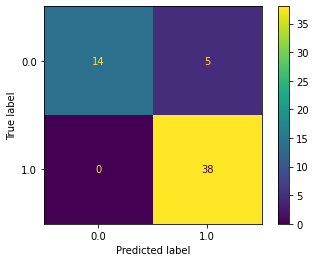

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Yval, YvalPred, labels = np.unique(Yval))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = np.unique(Yval))
disp.plot()
plt.show()

Finalmente Calculamos el P-Value del modelo.